# Studying Support Vector Machines

Having used support vector machines (SVM) for classification problems I decided to learn the mathematical theory behind them which the lack thereof is probably the principal reason for my poor results. Because of the awesomeness of [orgmode](https://orgmode.org/) and how easy it is to turn notes into a blog post I decided to do it. The structure of the document is:

- Theory : mathematical formulation of SVM and theory of solver
- Visualisation : python code for plotting SVM
- Exploration : show how SVM work in practise

## Theory

To start SVM is a technique for data classification (and regression as I will show in the end). Having a training set with labels and features SVM can create a model which predicts the labels of the test data. At this point I have found it useful to define what is it that we want to achieve since most of the work in SVM is to transform the initial solution into a useful solution. That is we are looking for a linear analytical convex optimization problem which has the innate characteristic of supporting different topological spaces.

Given a training set of feature and label pairs $(\mathbf{x}_i, y_i), i=1,\ldots,N$ where $N$ is the number of data points, the features $\mathbf{x} \in R^n$ ($\mathbf{x}$ is a vector holding the features of a data point) and labels $y \in (-1, 1)$ the support vector machine finds a hyperplane (plane with dimension of $n-1$) which separates the classes by minimizing the error and maximizing the perpendicular distance between the closest (most critical) points [[0]](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf). The decision function is then fully specified by a subset of training samples known as support vectors. Using the terminology of Professor Winston shown [here [1]](https://www.youtube.com/watch?v=_PwhiWxHK8o), the support vectors are the gutters of the street with the center line being the hyperplane (in 2D this is just a line). The equations for the support vectors are given below, taken from the amazingly written article titled "An Idiot’s guide to Support vector
machines (SVMs)" [[2]](http://web.mit.edu/6.034/wwwbob/svm.pdf) - this was perfect for me :)

$$
\begin{aligned}
\mathbf{w}.\mathbf{x}_i + b = 1 && \text{support vector for } y_i = 1\\
\mathbf{w}.\mathbf{x}_i + b = 0 && \text{street center line}\\
\mathbf{w}.\mathbf{x}_i + b = -1 && \text{support vector for } y_i = -1
\end{aligned}
$$

What the above means is that a vector $\mathbf{x}_i$ points to a point somewhere and the inner product (dot product) with the normal to the hyperplane gives a constant $b$. Mathematically $\mathbf{w} \cdot \mathbf{x}_i = ||\mathbf{w}|| ||\mathbf{x}_i|| cos(\theta) = -b$, where $ ||.|| $ denotes the Euclidian distance i.e. size. and $cos(\theta)$ is the cosine of the smaller angle between the two vectors. The other two equations are for the decision boundaries (hyperplanes that go through the closest points) and we just define that they give $1-b$ and $-1-b$. Why? If we chose $5-b$ and $-5-b$ and are consistent the constant factor will be dropped in the optization problem as shown below. The important property here is that we are looking for symmetry.

The above definition gives an inifite  number of hyperplanes since there are infinite values for $b$, therefore, we need more constraints. In SVM the additional constraint is that we choose the hyperplane which maximizes the distance between the decision boundaries. We wish to maximize the distance between the gutters (support vectors) and the center line of the street (hyperplane). This is the Euclidian distance expressed below for half of the street. We take the modulus of the of hyperplane since we are interested in the distance.

$$
\frac{|\mathbf{w}.\mathbf{x}+b|}{||\mathbf{w}||} = \frac{|+1|}{||\mathbf{w}||} = \frac{|-1|}{||\mathbf{w}||} = \frac{1}{||\mathbf{w}||}
$$

Due to symmetry the total distance is then given by

$$
\frac{2}{||\mathbf{w}||}
$$

To visualize what we have until now I have largely adapted a tikz script from Yifan Peng which you can find [here](http://blog.pengyifan.com/tikz-example-svm-trained-with-samples-from-two-classes/). The adapted script is shown below for reproducability.

\documentclass[10pt,letterpaper]{article}
 
\usepackage{tikz}
\usetikzlibrary{arrows}
\usetikzlibrary{shapes.misc}
 
\usepackage[active,tightpage,pdftex]{preview}
\PreviewEnvironment{tikzpicture}
 
\tikzset{cross/.style={cross out, draw=black, minimum size=2*(#1-\pgflinewidth), inner sep=0pt, outer sep=0pt, rotate=45},
	cross/.default={3pt}}
 
\begin{document}
\begin{tikzpicture}
	% axes
	\draw [<->,thick] (0,5) node (yaxis) [above] {$x_2$}
		|- (5,0) node (xaxis) [right] {$x_1$};
        
  	% draw line
  	\draw (0,-1) -- (5,4); % y=x-1
  	\draw[dashed] (-1,0) -- (4,5); % y=x+1
  	\draw[dashed] (2,-1) -- (6,3); % y=x-3
  
  	% \draw labels
  	\draw (3.5,3) node[rotate=45,font=\small] 
    	{$\mathbf{w}\cdot \mathbf{x} + b = 0$};
  	\draw (2.5,4) node[rotate=45,font=\small] 
        {$\mathbf{w}\cdot \mathbf{x} + b = 1$};
  	\draw (4.5,2) node[rotate=45,font=\small] 
        {$\mathbf{w}\cdot \mathbf{x} + b = -1$};
        
 	% street with
  	\draw[dotted] (4,5) -- (6,3);
  	\draw (5.25,4.25) node[rotate=-45] {$\frac{2}{\Vert \mathbf{w} \Vert}$};
  
  	% dots class 0
	\draw[black, thick]   (1.5,2.5)   circle (3pt);
	\draw (1.5, 2.5) node[cross]{};
	\draw[black] (1,2.5)     circle (3pt);
	\draw (1, 2.5) node[cross]{};
	\draw[black] (0.75,2)    circle (3pt);
	\draw (0.75, 2) node[cross]{};
	\draw[black] (0.6,1.9)   circle (3pt);
	\draw (0.6, 1.9) node[cross]{}; 
	\draw[black] (0.77, 2.5) circle (3pt);
	\draw (0.77, 2.5) node[cross]{};
	\draw[black] (1.5,3)     circle (3pt);
	\draw (1.5, 3) node[cross]{};
	\draw[black] (1.3,3.3)   circle (3pt);
	\draw (1.3, 3.3) node[cross]{};
	\draw[black] (0.6,3.2)   circle (3pt);
	\draw (0.6, 3.2) node[cross]{};
	
	% dots class 1
	\draw[black, thick] (4,1)     circle (3pt); 
	\draw[black, thick] (3.3,.3)  circle (3pt); 
	\draw[black]     (4.5,1.2) circle (3pt); 
	\draw[black]     (4.5,.5)  circle (3pt); 
	\draw[black]     (3.9,.7)  circle (3pt);  
	\draw[black]     (3.5,.2)  circle (3pt); 
	\draw[black]     (4,.3)    circle (3pt);
	
\end{tikzpicture}
\end{document}

Using [babel](https://orgmode.org/worg/org-contrib/babel/) the script can be compiled to a pdf file. I mainly use pdf files for plotting in my notes/papers so I nevered had to figure out how to make tikz spit an svg file. So here I am going for a lazy solution to just convert it using pdf2svg.

pdf2svg file.pdf file.svg

<img src="./fig/svm.svg" alt="drawing" width="500"/>

We can now follow the logical sequence than since it ok to maximize $2/||w||$ it is ok to maximize $1/||w||$ and minimize $||w||$. Finally, for mathematical convenience it is ok to minimize $\frac{1}{2}||w||^2$. This mathematical convenience lies in the fact that the least squares error coincides with the maximum likelihood estimates if we assume that the errors are independent, normally distributed, with zero mean and have equal variances. Our optimization problem then becomes:

$$
\arg \underset{\mathbf{w}} {min} \frac{1}{2}||\mathbf{w}||^2
$$

Also assuming that no data points exist between the gutters i.e. our error has to be $0$, we get the following:

$$
\begin{aligned}
\mathbf{w}.\mathbf{x}_i + b \geq 1 && ,\text{if} && y_i = 1\\
\mathbf{w}.\mathbf{x}_i + b \leq -1 && ,\text{if} && y_i = -1
\end{aligned}
$$

Or we can combine them into one equation by using the variable $y_i$ as such: $y_i(\mathbf{x}_i.\mathbf{w})\geq 1$.

This is a quadratic constraint optimization problem which means that the surface if quadratic. This is great news since quadratic surfaces have a single extremum (minama/maxima). Or otherwise said, our solver is guaranteed to not get trapped in local minimas unlike navigating through neural networks. A two dimensional case with features called $x_1$ and $x_2$ is shown below. The image is blatantly taken from [this](https://en.wikipedia.org/wiki/Lagrange_multiplier) wikipedia article.

<img src="./fig/LagrangeMultipliers2D.svg" alt="drawing" width="500"/>

This is a constraint optimization problem. As with all optimization problems it can be solved numerically, however, numerical solutions introduce a whole host of other problems such as issues with convergence and additional hyperparameters. It turns out that there is a better approach and an analytical solution can be found. We are looking for the maxima of $f$ to exist on $g$. If we superimpose the two functions, the gradients must line up, otherwise there is no solution. The gradient will return the direction in which a function increases most rappidly (steepest ascent in this case). Now we require that the two gradients are in the same direction and therefore they must be multiples of each other. The constant which gives the equality is called a Lagrange multiplier and is needed because the directions of the vectors are parallel but the magnitudes as different. Mathematically this can be expressed as below.

$$
\nabla f = -\lambda \nabla g
$$

Where $\lambda$ is the Lagrange multiplier and $\nabla$ is the gradient given by $\nabla = \frac{\partial}{\partial x^i} \mathbf{e}^i$. The negative sign of $\lambda$ is arbitrary and the derivation can be done with a positive sign. It really does not matter since $\lambda$ is a constant.

A little more explanation on the above is that at the solution point (assuming we have somehow found it) the constraint is tangent to the surface. This is what having a solution means. Now the derivatives of $f$ and $g$ will both point towards the extremum of $f$ which is the maxima in this case. There is no other way if a solution exists since we superimposed $g$ on $f$.

Rearranging gives

$$
\frac{\partial f}{\partial x^i} + \lambda \frac{\partial g}{\partial x^i} = 0
$$

We also need a second constraint which will we require that the solution also lie on the constraint which is obvious but necessary condition. This is because the above equation only guarantees that the gradients are in the same direction which is neccessary but not sufficient and we will get infinite solutions. To get a unique answer we need both as such $g(\mathbf{x^i}) = 0$. For the derivatives to work we also need to assume the functions have continuous first derivatives $f, g \in C^1$. The problem can now be expressed as optimization of the Lagrangian $\mathcal{L}$.

$$
\mathcal{L} (x, \lambda) = f(x) + \lambda g(x)\\
\nabla \mathcal{L} = 0
$$

The above is exaclty the same formulation as before as quickly shown below.

$$
\begin{aligned}
\nabla \mathcal{L} & = 0\\
\frac{\partial \mathcal{L}}{\partial x} & = 0 = \frac{\partial f}{\partial x} + \frac{\partial \lambda g}{\partial x} = \frac{\partial f}{\partial x} + \lambda \frac{\partial g}{\partial x}\\
\frac{\partial \mathcal{L}}{\partial \lambda} & = 0 = \frac{\partial f}{\partial \lambda} + \frac{\partial \lambda g}{\partial \lambda} = 0 + g(x) = g(x)
\end{aligned}
$$

We can now generalize the expression to multiple constraints.

$$
\mathcal{L} (x^i, \lambda) = f(x^i) + \sum_i \lambda_i g_i(x^i)
$$

We can now implement the Lagrangian for SVM. The optimization problem is shown below.

$$
\begin{aligned}
\arg  \underset{{\mathbf{w}}}{min} && \frac{1}{2} ||\mathbf{w}||^2\\
\text{subject to} && y_i (\mathbf{w} \cdot \mathbf{x}_i + b) = 1
\end{aligned}
$$

The Lagrangian is therefore given by the following over $N$ training points. This is known as the primal optimization problem. Later we are going to derive the dual optimization which is what we will use.

$$
\begin{aligned}
\arg \underset{{\mathbf{w},b}} {min}  \mathcal{L}_p (x^i, b, \lambda) = & \frac{1}{2} ||\mathbf{w}||^2 - \sum_i \lambda_i y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \\
 =& \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^N {\lambda_i y_i (\mathbf{w} \cdot \mathbf{x}_i + b)} + \sum_{i=1}^N {\lambda_i}
\end{aligned}
$$

To minimize get the derivates with respect to $x$ and $b$ and set to zero.

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w} & = \mathbf{w} - \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i = 0\\
\frac{\partial \mathcal{L}}{\partial b} & = \sum_{i=1}^{N} \lambda_i y_i = 0\\
\end{aligned}
$$

Therefore

$$
\begin{aligned}
& \mathbf{w} = \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i \\
& \sum_{i=1}^N \lambda_i y_i = 0
\end{aligned}
$$

The above gives us an extremely important insight into the problem. We now know that the weights $w$ are a linear combination of the features, $x$, the labels, $y$ and the Lagrangian multipliers, $\lambda_i$.

We can now solve the above problem and get our results. However, we will not have achieved one of our criteria at the start and that is the ability to innately handle different topological spaces which will be extremely limiting as will be shown later. The above equations depend on $w$ and $b$ which is normal since this is what we derived : ). To allow the space to be transformed it is very desirable to remove that dependence. Luckily there is the Kuhn-Tucker theorem which states:

So substituting back into the primal optimization problem we obtain

$$
TODO
\begin{aligned}
\mathcal{L}_p (x^i, b, \lambda) = & \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^N {\lambda_i y_i (\mathbf{w} \cdot \mathbf{x}_i + b)} + \sum_{i=1}^N {\lambda_i} \\
= &  \frac{1}{2} 
\end{aligned}
$$

$$
\sum_{i=1}^N \lambda_i y_i = 0
$$

Solving the dual optimization problem we obtain the Lagrangian multipliers! Literature tells us only the support vectors (in the street gutter) will be non-zero. This is important so we can check it later in scikit-learn. From here we can calculate the weights as below

$$
\mathbf{w} = \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i
$$

Following from the Lagrangian multipliers most of the weights will also be zero. Only the ones associated with the support vectors will have non-zero values.

Therefore, having trained on some linearly separable data we can classify an unknown points $p$ as below

$$
f(x) = \mathbf{w} \cdot \mathbf{p} + b = \sum_{i=1}^N (\lambda_i y_i \mathbf{x}_i \cdot \mathbf{p}) + b
$$

The classification is then determined by the sign of $f(x)$.

$$
sgn f(x)
$$

In scikit-learn there is one more term, $C$, added to the optimization which takes care of data that is impossible to separate with a given kernel. This is likely to occur since data from the real world is likely to be noisy. This parameter controls how much error we tolerate and in essence determines the trade-off between the bias and variance of our classifier. Unfortunately, $C$ is a hyperparameter and needs to be tuned. The modified equations are shown below.

$$
\begin{aligned}
\arg  \underset{{\mathbf{w},b,\mathbf{\xi}}}{min} && \frac{1}{2} \mathbf{w}^{T} \mathbf{w} + C \sum_{i=1}^N \xi_i\\
\text{subject to} && y_i (\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1 - \xi_i\\
&& \xi_i \geq 0
\end{aligned}
$$

## Visualisation

The SVM implementation in scikit-learn is used. The first dataset is [make blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) which is random points sampled from a gaussian distribution to experiment with how SVM work and learn the mathematics behind it. The second set is the [iris](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset which has noisy points, thereby allowing the use of SVM in practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm
import random
import sys
%matplotlib inline

Secondly we need to plot the results. The first step is to make a matrix of points which constituted our mesh with a grid point size of $h\times h$.

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

The second step is to fill the mesh with the contours values. Every grid point in the mesh is passed to the trained SVM classifier to determine its label. The result is a contour plot showing the decision bondaries.

In [104]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

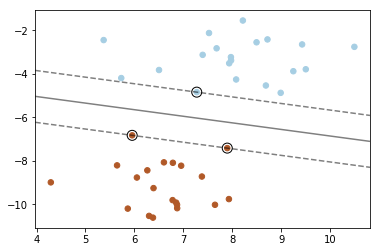

In [12]:
# we create 40 separable points
blobs = datasets.make_blobs(n_samples=40, centers=2, random_state=6)
X, y = blobs

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
YY, XX = np.meshgrid(ylim, xlim)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Exploration

In [125]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

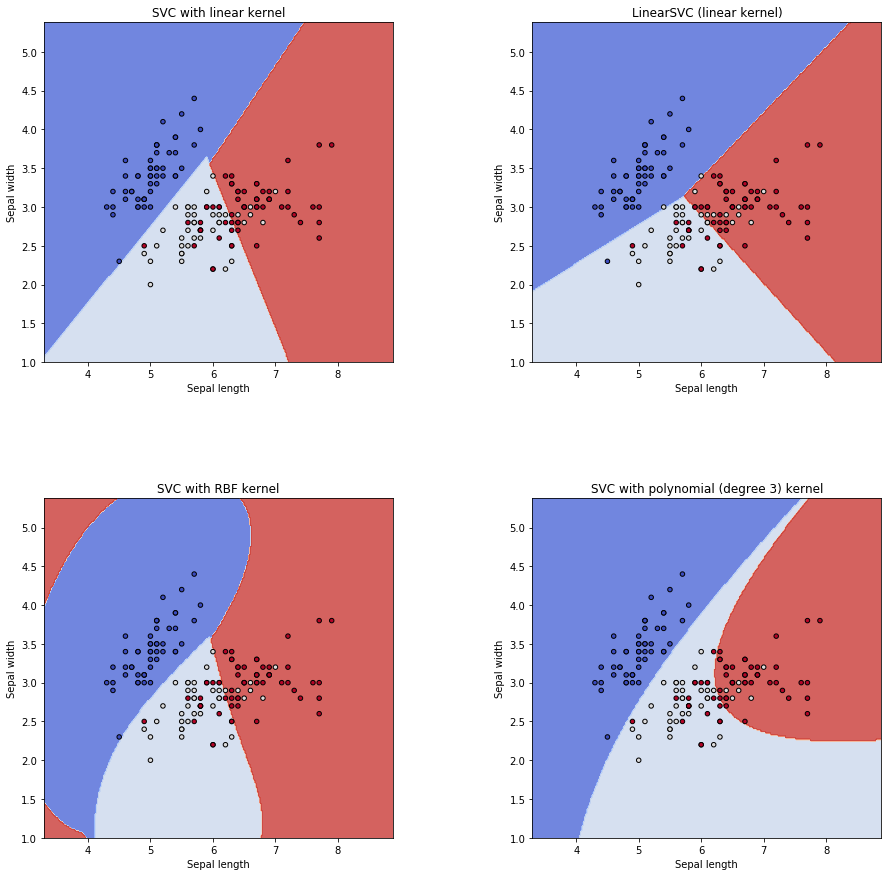

In [126]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(title)

plt.show()

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html